# Przewidywanie cen domów

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.linear_model as linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


#### 1. Załadownie danych

In [2]:
df = pd.read_csv('Dane/ames2000_NAfix.csv', delimiter=',', nrows=None)

#### 2. Analiza danych

In [3]:
nRow, nCol = df.shape
print(f'ilość wierszy {nRow} ilosc kolumn {nCol}')

ilość wierszy 2000 ilosc kolumn 80


In [4]:
df.head(5)

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,120,RL,34,3901,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,8,2007,New,Partial,204000
1,20,RL,70,8400,Pave,None,Reg,Lvl,AllPub,Corner,...,0,None,MnPrv,None,0,4,2010,WD,Normal,126000
2,85,RL,60,7200,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,4,2009,WD,Normal,133900
3,90,RL,64,7018,Pave,None,Reg,Bnk,AllPub,Inside,...,0,None,None,None,0,6,2009,WD,Alloca,118858
4,60,RL,111,16259,Pave,None,Reg,Lvl,AllPub,Corner,...,0,None,None,None,0,9,2006,New,Partial,342643


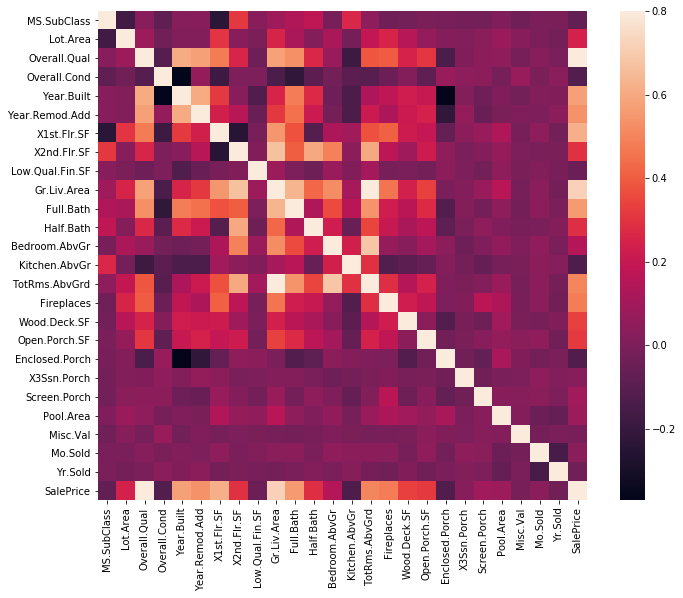

In [5]:
#macierz korealacji 
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 80 columns):
MS.SubClass        2000 non-null int64
MS.Zoning          2000 non-null object
Lot.Frontage       2000 non-null object
Lot.Area           2000 non-null int64
Street             2000 non-null object
Alley              2000 non-null object
Lot.Shape          2000 non-null object
Land.Contour       2000 non-null object
Utilities          2000 non-null object
Lot.Config         2000 non-null object
Land.Slope         2000 non-null object
Neighborhood       2000 non-null object
Condition.1        2000 non-null object
Condition.2        2000 non-null object
Bldg.Type          2000 non-null object
House.Style        2000 non-null object
Overall.Qual       2000 non-null int64
Overall.Cond       2000 non-null int64
Year.Built         2000 non-null int64
Year.Remod.Add     2000 non-null int64
Roof.Style         2000 non-null object
Roof.Matl          2000 non-null object
Exterior.1st       

#### wyszukanie kolumn zaawierajacych puste wartosci

In [7]:
df.columns[df.isna().any()].tolist()

['Mas.Vnr.Type',
 'Bsmt.Qual',
 'Bsmt.Cond',
 'Bsmt.Exposure',
 'BsmtFin.Type.1',
 'BsmtFin.Type.2',
 'Garage.Finish',
 'Garage.Qual',
 'Garage.Cond']

#### uzupełnie pustych wartości

In [8]:
df['Mas.Vnr.Type'] = df['Mas.Vnr.Type'].fillna('None')
df['Bsmt.Qual'] = df['Bsmt.Qual'].fillna('None')
df['Bsmt.Cond'] = df['Bsmt.Cond'].fillna('None')
df['Bsmt.Exposure'] = df['Bsmt.Exposure'].fillna('None')
df['BsmtFin.Type.1'] = df['BsmtFin.Type.1'].fillna('None')
df['BsmtFin.Type.2'] = df['BsmtFin.Type.2'].fillna('None')
df['Garage.Finish'] = df['Garage.Finish'].fillna('None')
df['Garage.Qual'] = df['Garage.Qual'].fillna('None')
df['Garage.Cond'] = df['Garage.Cond'].fillna('None')

In [9]:
df.columns[df.isna().any()].tolist()

[]

#### patrzebujemy wartości numerycznych, przekształcamy kolumny z wartościami nie numerycznymi w zmienne dodatkowe

In [10]:
data = pd.get_dummies(df)

In [11]:
data.columns[data.isna().any()].tolist()

[]

#### wyciągnięcie do y  wartość prognozowanej

In [12]:
y = data['SalePrice'].values
y

array([204000, 126000, 133900, ..., 233000, 134900, 180000])

#### reszta przypisana do X

In [13]:
X = data.drop('SalePrice', axis=1).values
X

array([[  120,  3901,     6, ...,     0,     0,     1],
       [   20,  8400,     4, ...,     0,     1,     0],
       [   85,  7200,     5, ...,     0,     1,     0],
       ...,
       [   60, 10142,     7, ...,     0,     1,     0],
       [   85,  7252,     5, ...,     0,     1,     0],
       [  160,  2998,     6, ...,     0,     1,     0]])

sprawdzam X

In [14]:
X.shape

(2000, 4254)

sprawdzam y

In [15]:
y.shape

(2000,)

In [16]:
y=y.reshape(-1,1)
y.shape

(2000, 1)

#### podział testu na zestwaw treningowy testowy, model będzie uczony na zestawie treningowym a zestaw testowy zostanie wykorzystany do jego oceny

In [17]:

X_train, X_test,y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

### A. model regresji liniowej

In [18]:
model= linear_model.LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


#### miary błędu, miary dopasowania 

In [19]:
#dopasowanie do modelu 
R2= model.score(X_test ,y_test)
print("R2 :", R2)
print()
#ceny mieszkan odchylają się o średni błąd bezwzgędny od wartośći rzeczywistej
print('MAE:', mean_absolute_error(y_test, y_pred))
#błąd średniokwadratowy
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

#Wartość przewidywana a prawdziwa
print()
print("Predict value " + str(model.predict([X_test[130]])))
print("Real value " + str(y_test[130]))

R2 : 0.8217597232958219

MAE: 20643.796919884087
MSE: 1262171413.4139392
RMSE: 35527.0518536782

Predict value [[130111.44881597]]
Real value [137000]


##### wykres wartości przewidywanych od prawdziwych

In [20]:
predictions = model.predict(X_test)
predictions = predictions.reshape(-1,1)

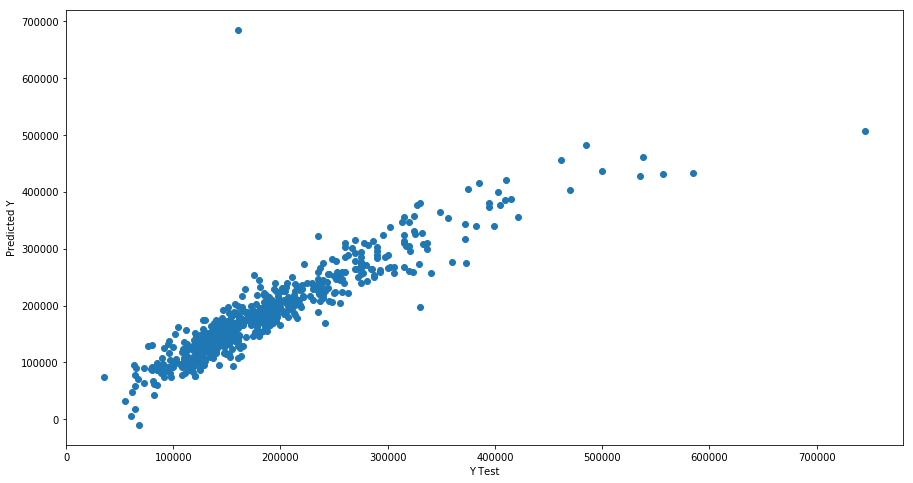

In [21]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

### B. Drzewo regresyjne


In [22]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 42)
dtreg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [23]:
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

In [24]:
#dopasowanie do modelu 
R2= dtreg.score(X_test ,y_test)
print("R2 :", R2)

print('MAE:', mean_absolute_error(y_test, dtr_pred))
print('MSE:', mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, dtr_pred)))

R2 : 0.7308671690190423
MAE: 24102.786666666667
MSE: 1905808114.51
RMSE: 43655.56224022318


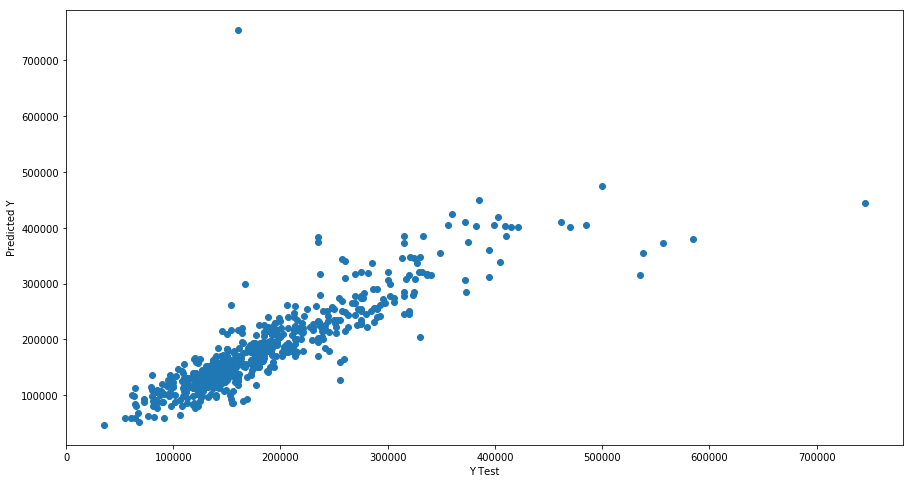

In [25]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,dtr_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

### C. Las losowy 

In [26]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfr.fit(X_train, y_train)

/home/laptop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [27]:
rfr_pred= rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)

In [28]:
print("R2 :", rfr.score(X_test ,y_test))
print('MAE:', mean_absolute_error(y_test, rfr_pred))
print('MSE:', mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rfr_pred)))

R2 : 0.858534388644556
MAE: 17352.374
MSE: 1001759276.4979268
RMSE: 31650.58098199663


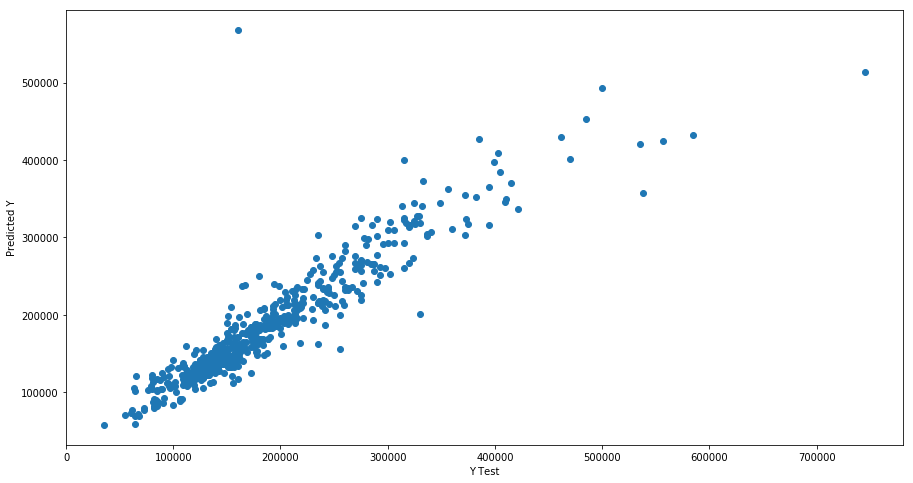

In [29]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,rfr_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

### Podsumowanie

In [30]:
print("regresja liniowa")
print("R2:", model.score(X_test ,y_test))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print("")
print("drzewo decyzyjne")
print("R2 :", dtreg.score(X_test ,y_test))
print('MAE:', mean_absolute_error(y_test, dtr_pred))
print('MSE:', mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, dtr_pred)))
print("")
print("las losowy")
print("R2 :", rfr.score(X_test ,y_test))
print('MAE:', mean_absolute_error(y_test, rfr_pred))
print('MSE:', mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rfr_pred)))
print('')
print('las losowy wypadł najlepiej')

regresja liniowa
R2: 0.8217597232958219
MAE: 20643.796919884087
MSE: 1262171413.4139392
RMSE: 35527.0518536782

drzewo decyzyjne
R2 : 0.7308671690190423
MAE: 24102.786666666667
MSE: 1905808114.51
RMSE: 43655.56224022318

las losowy
R2 : 0.858534388644556
MAE: 17352.374
MSE: 1001759276.4979268
RMSE: 31650.58098199663

las losowy wypadł najlepiej
